# Actividad 1: Trabajando con redes neuronales y Deep Learning

## Clasificación

<p style='color:gray'> Óscar Jiménez Osuna - Enero 2021</p>

In [1]:
%config IPCompleter.greedy=True
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

**Información del conjunto de datos:**

Este conjunto de datos incluye datos para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos alimentarios y condición física. Los datos contienen 17 atributos y 2111 registros, los registros están etiquetados con la variable de clase NObesidad (Nivel de obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Nivel de Sobrepeso I, Nivel de Sobrepeso II, Obesidad Tipo I , Obesidad tipo II y obesidad tipo III. El 77% de los datos se generaron sintéticamente utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recopilaron directamente de los usuarios a través de una plataforma web.


Información de atributos:

1. gender (categorica)
2. age (numérica) 
3. height (numérica) 
4. ¿what is your weight? (numérico)
5. ¿Has a family member suffered or suffers from overweight? (binaria)
6. ¿Do you eat high caloric food frequently? (binaria)
7. ¿Do you usually eat vegetables in your meals? (binaria) FCVC
8. ¿How many main meals do you have daily? (categorica) NCP
9. ¿Do you eat any food between meals? (categorica) CAEC
10. ¿Do you smoke? (binaria) SMOKE
11. ¿How much water do you drink daily? (categorica) CH2O
12. ¿Do you monitor the calories you eat daily? (binaria) SCC
13. ¿How often do you have physical activity? (categorica) FAF
14. ¿How much time do you use technological devices such as cell phone, videogames, television, computer and others? (categorica) TUE
15. ¿how often do you drink alcohol? (categorica) CALC
16. ¿Which transportation do you usually use? (categorica) MTRANS
17. Obesity Level (categorica) NObeyesdad

*Descarga dataset: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+*

Cargamos librerias y nuestro dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras import layers
from matplotlib import pyplot

### Carga de datos y análisis preliminar

In [3]:
url = "https://raw.githubusercontent.com/oscarjimenezo/Portfolio/master/Actividades%20Tecnicas%20de%20inteligencia%20artificial/Laboratorio/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(url)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# Tenemos 7 tipos de clases.
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

No tenemos ningún valor nulo.

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
# Realizamos unas gráficas para ver qué nos dicen de los datos
column_names = df.columns
column_names

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Male      1068
Female    1043
Name: Gender, dtype: int64


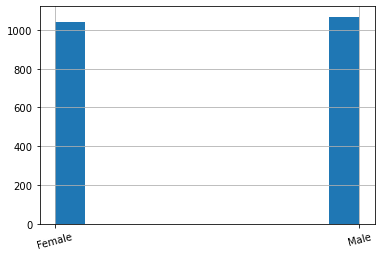

18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
19.314964      1
21.900120      1
23.421726      1
18.312665      1
61.000000      1
Name: Age, Length: 1402, dtype: int64


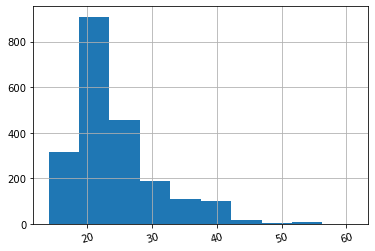

1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.680762     1
1.819875     1
1.530248     1
1.654067     1
1.885543     1
Name: Height, Length: 1574, dtype: int64


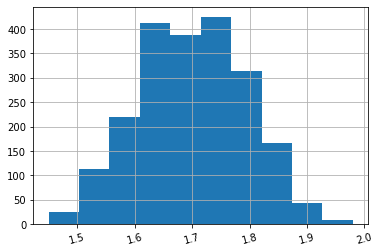

80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
90.138680      1
89.738596      1
115.828167     1
108.721893     1
122.119682     1
Name: Weight, Length: 1525, dtype: int64


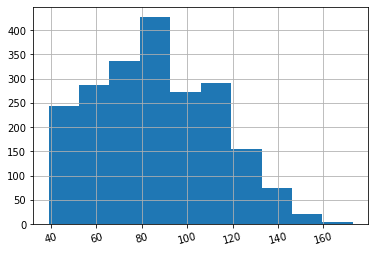

yes    1726
no      385
Name: family_history_with_overweight, dtype: int64


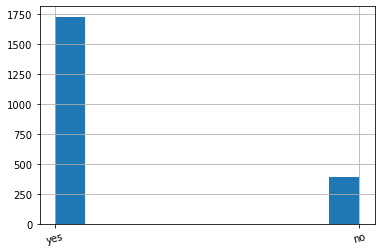

yes    1866
no      245
Name: FAVC, dtype: int64


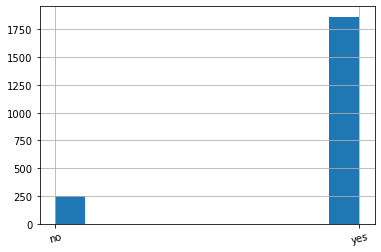

3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.816460      2
           ... 
1.943130      1
2.530233      1
1.443674      1
2.076689      1
2.562100      1
Name: FCVC, Length: 810, dtype: int64


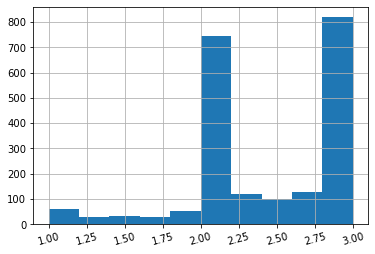

3.000000    1203
1.000000     199
4.000000      69
3.985442       2
1.104642       2
            ... 
2.658837       1
1.240424       1
2.057935       1
2.337035       1
2.434347       1
Name: NCP, Length: 635, dtype: int64


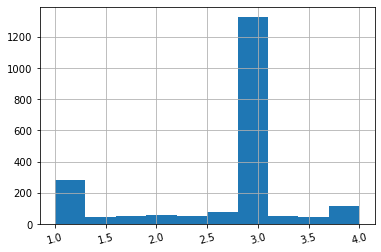

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


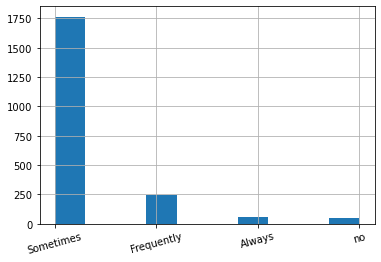

no     2067
yes      44
Name: SMOKE, dtype: int64


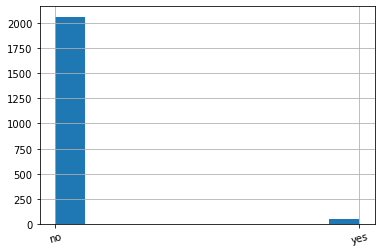

2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
           ... 
2.931438      1
2.224914      1
2.724099      1
2.714091      1
2.318736      1
Name: CH2O, Length: 1268, dtype: int64


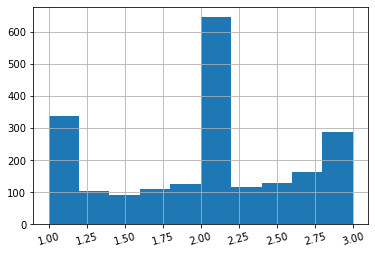

no     2015
yes      96
Name: SCC, dtype: int64


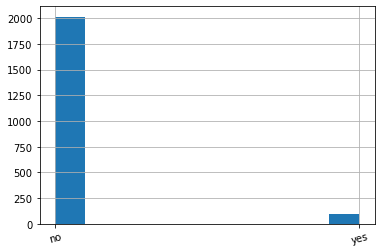

0.000000    411
1.000000    234
2.000000    183
3.000000     75
1.067817      2
           ... 
0.979306      1
0.246290      1
1.217180      1
1.684582      1
1.170537      1
Name: FAF, Length: 1190, dtype: int64


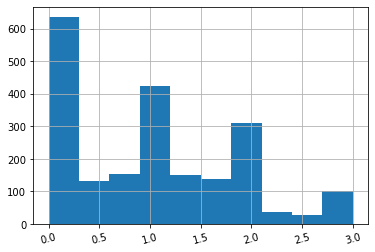

0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
0.220029      1
0.052942      1
0.957463      1
1.425852      1
0.857438      1
Name: TUE, Length: 1129, dtype: int64


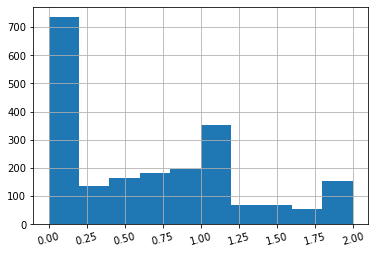

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


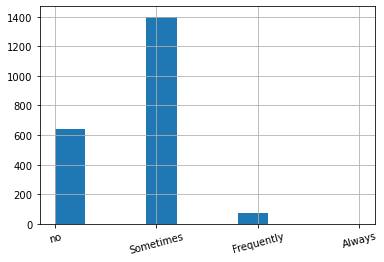

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


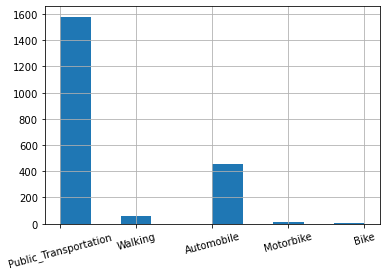

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


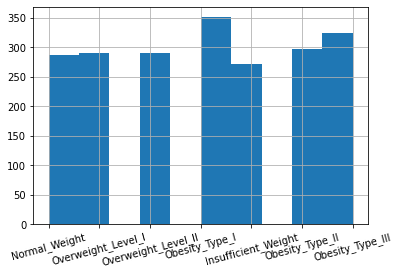

In [8]:
for name in column_names: 
    print(df[name].value_counts())
    df[name].hist()
    plt.xticks(rotation=15, fontsize = 10)
    plt.show()

Factorizamos las columnas no númericas

In [9]:
all_columns_list = df.select_dtypes(include=['object']).columns.values.tolist()

for i in range(len(all_columns_list)):    
    print(df.columns[i], df[all_columns_list[i]].unique().tolist())

Gender ['Female', 'Male']
Age ['yes', 'no']
Height ['no', 'yes']
Weight ['Sometimes', 'Frequently', 'Always', 'no']
family_history_with_overweight ['no', 'yes']
FAVC ['no', 'yes']
FCVC ['no', 'Sometimes', 'Frequently', 'Always']
NCP ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
CAEC ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III']


In [10]:
for i in range(len(all_columns_list)):
    df[all_columns_list[i]] = pd.factorize(df[all_columns_list[i]])[0]
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,0,0,2.0,3.0,0,0,2.000000,0,0.000000,1.000000,0,0,0
1,0,21.000000,1.520000,56.000000,0,0,3.0,3.0,0,1,3.000000,1,3.000000,0.000000,1,0,0
2,1,23.000000,1.800000,77.000000,0,0,2.0,3.0,0,0,2.000000,0,2.000000,1.000000,2,0,0
3,1,27.000000,1.800000,87.000000,1,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,2,1,1
4,1,22.000000,1.780000,89.800000,1,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,0,1,3.0,3.0,0,0,1.728139,0,1.676269,0.906247,1,0,6
2107,0,21.982942,1.748584,133.742943,0,1,3.0,3.0,0,0,2.005130,0,1.341390,0.599270,1,0,6
2108,0,22.524036,1.752206,133.689352,0,1,3.0,3.0,0,0,2.054193,0,1.414209,0.646288,1,0,6
2109,0,24.361936,1.739450,133.346641,0,1,3.0,3.0,0,0,2.852339,0,1.139107,0.586035,1,0,6


# Correlación

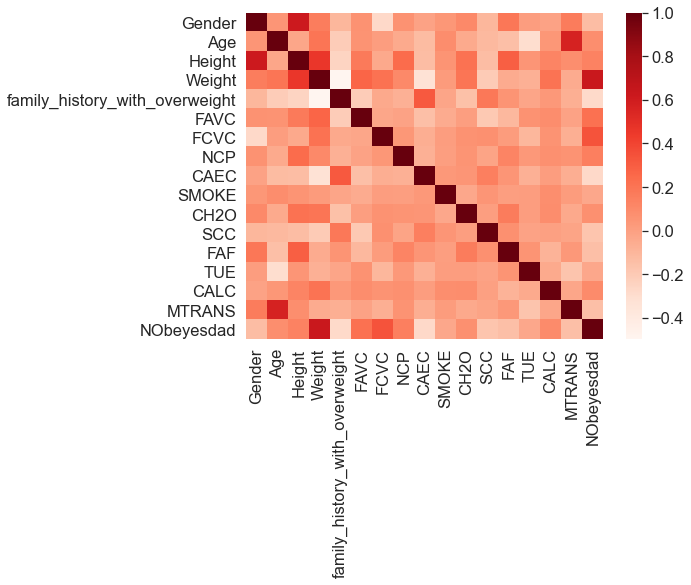

In [11]:
corr = df.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='Reds')
plt.show()

Existen buenas correlaciones entre género y altura y algo menos entre peso y altura. El atributo más correlacionado con nuestro atributo clase es el peso seguido de FCVC (si como o no vegetales).

In [12]:
x = df.iloc[:,:16]
y = df.iloc[:,16]
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 1234, shuffle = True)
results = []

### Regresión logística

In [13]:
parametros = {
    'penalty': ('l1', 'l2', 'elasticnet', 'none'),
    'multi_class': ('auto', 'ovr', 'multinomial'),
    'class_weight': ('balanced', 'None'),
    'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

model = LogisticRegression()

clf = GridSearchCV(model, parametros, cv = 5)
clf.fit(X_train, y_train)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle = True)
cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy') 
results.append(cv_results)  
print()

In [14]:
print("Mejor clasificador: ", clf.best_estimator_ , "\n")
print('Mejor atributo --> %s - accuracy: %0.2f - std: %0.2f' % (name, cv_results.mean()*100, cv_results.std()*100), "\n")

Mejor clasificador:  LogisticRegression(class_weight='balanced', penalty='none', solver='newton-cg') 

Mejor atributo --> NObeyesdad - accuracy: 95.56 - std: 1.53 



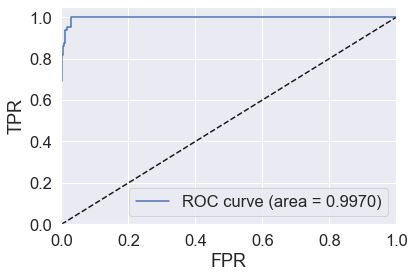

In [15]:
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)     
roc_auc = metrics.auc(fpr, tpr)
    
plt.figure()   
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')    
plt.legend(loc="lower right")    
plt.show()

### Árbol de decisión

In [16]:
parametros = {
    'criterion': ('gini', 'entropy'),
    'splitter': ('best', 'random'),
    'max_depth': (3, 5, 7),
    'max_features': ('auto', 'sqrt', 'log2')}

model = DecisionTreeClassifier()

clf = GridSearchCV(model, parametros, cv = 5)
clf.fit(X_train, y_train)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle = True)
cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy') 
results.append(cv_results) 
print()

In [17]:
print("Mejor clasificador: ", clf.best_estimator_ , "\n")
print('Mejor atributo --> %s - accuracy: %0.2f - std: %0.2f' % (name, cv_results.mean()*100, cv_results.std()*100), "\n")

Mejor clasificador:  DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='auto') 

Mejor atributo --> NObeyesdad - accuracy: 75.12 - std: 4.18 



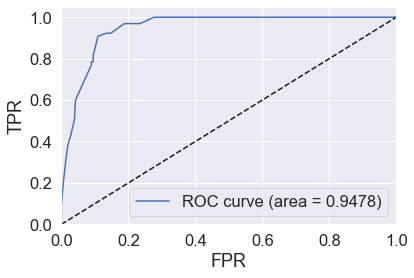

In [18]:
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)     
roc_auc = metrics.auc(fpr, tpr)
    
plt.figure()   
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')    
plt.legend(loc="lower right")    
plt.show()

### Perceptrón multicapa

In [19]:
parametros = {
    'hidden_layer_sizes': ((5,3), (5,5), (3, 2, 1), (3 ,2, 2)),
    'activation': ('identity', 'logistic', 'tanh', 'relu'),
    'solver': ('lbfgs', 'sgd', 'adam')}

model = MLPClassifier()

clf = GridSearchCV(model, parametros, cv = 5)
clf.fit(X_train, y_train)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle = True)
cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy') 
results.append(cv_results) 
print()

In [20]:
print("Mejor clasificador: ", clf.best_estimator_ , "\n")
print('Mejor atributo --> %s - accuracy: %0.2f - std: %0.2f' % (name, cv_results.mean()*100, cv_results.std()*100), "\n")

Mejor clasificador:  MLPClassifier(activation='identity', hidden_layer_sizes=(5, 5), solver='lbfgs') 

Mejor atributo --> NObeyesdad - accuracy: 69.20 - std: 4.54 



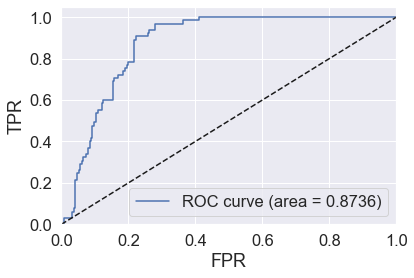

In [21]:
probs = clf.predict_proba(X_test)
probs = probs[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)     
roc_auc = metrics.auc(fpr, tpr)
    
plt.figure()   
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')    
plt.legend(loc="lower right")    
plt.show()

### Red neuronal Keras

In [22]:
# creamos un modelo con 3 capas oculta de 200, 100 y 25 neuronas y función de activaciónn relu. 
# con la capa de entrada Input instanciamos un tensor indicando que la entrada esperada serán lotes de vectores de 16 dimensiones.
# capa de salida 7 neuronas (una por cada categoría) y función de activación tipo 'softmax' apropiada para las clasificación. 
# Devuelve un arreglo de 7 probabilidades que suman a 1
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1], name ='in'),
    keras.layers.Dense(200, activation='relu', name='hidden_1'),
    keras.layers.Dense(100, activation='relu', name='hidden_2'),
    keras.layers.Dense(25, activation='relu', name='hidden_3'),
    keras.layers.Dense(7, activation='softmax', name='out')
])
labels = ('Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', 'Obesity_Type_III')
epocas = (10, 50, 100)

169/169 [==============================] - 4s 3ms/step - loss: 1.9827 - accuracy: 0.2262
14/14 - 0s - loss: 1.5062 - accuracy: 0.3262

Número de épocas: 10.00 - Test accuracy: 32.62


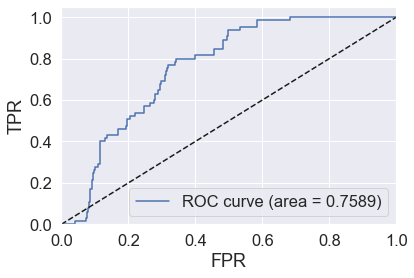

34/34 [==============================] - 0s 3ms/step - loss: 1.4155 - accuracy: 0.3868
14/14 - 0s - loss: 1.3173 - accuracy: 0.4468

Número de épocas: 50.00 - Test accuracy: 44.68


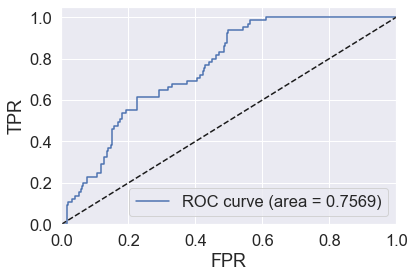

17/17 [==============================] - 0s 5ms/step - loss: 1.3049 - accuracy: 0.4342
14/14 - 0s - loss: 1.2703 - accuracy: 0.4657

Número de épocas: 100.00 - Test accuracy: 46.57


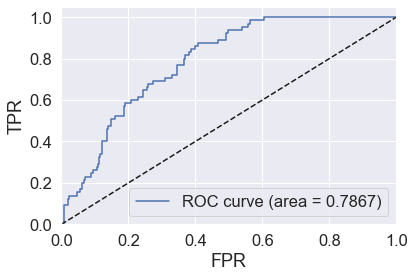

In [23]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenamos el modelo
for epoca in epocas:
    model.fit(X_train, y_train, epoca)
    # Evaluamos exactitud
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    print('\nNúmero de épocas: %.02f - Test accuracy: %0.2f' %(epoca,test_acc*100))
    
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)     
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()   
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')    
    plt.legend(loc="lower right")    
    plt.show()

169/169 [==============================] - 3s 2ms/step - loss: 12.2557 - accuracy: 0.3766
14/14 - 0s - loss: 12.6699 - accuracy: 0.4019

Número de épocas: 10.00 - Test accuracy: 40.19


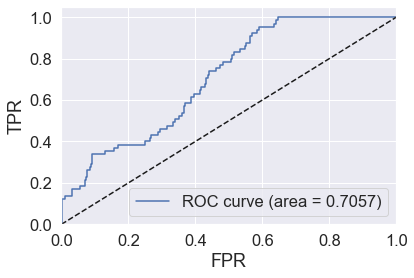

34/34 [==============================] - 0s 2ms/step - loss: 12.3850 - accuracy: 0.3714
14/14 - 0s - loss: 12.6692 - accuracy: 0.3877

Número de épocas: 50.00 - Test accuracy: 38.77


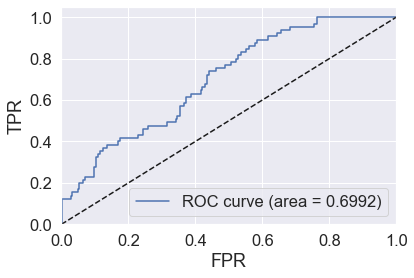

17/17 [==============================] - 0s 3ms/step - loss: 12.3845 - accuracy: 0.3691
14/14 - 0s - loss: 12.6689 - accuracy: 0.3712

Número de épocas: 100.00 - Test accuracy: 37.12


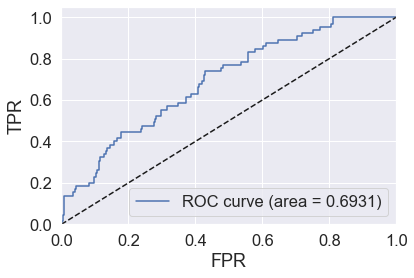

In [24]:
# Compilamos el modelo
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
# entrenamos el modelo
for epoca in epocas:
    model.fit(X_train, y_train, epoca)
    # Evaluamos exactitud
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    print('\nNúmero de épocas: %.02f - Test accuracy: %0.2f' %(epoca,test_acc*100))
    
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)     
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()   
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')    
    plt.legend(loc="lower right")    
    plt.show()

169/169 [==============================] - 2s 2ms/step - loss: 1.5366 - accuracy: 0.3677
14/14 - 0s - loss: 1.3591 - accuracy: 0.4350

Número de épocas: 10.00 - Test accuracy: 43.50


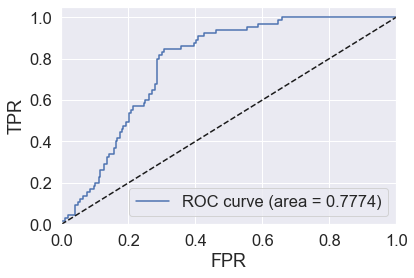

34/34 [==============================] - 0s 2ms/step - loss: 1.2114 - accuracy: 0.4745
14/14 - 0s - loss: 1.1720 - accuracy: 0.4161

Número de épocas: 50.00 - Test accuracy: 41.61


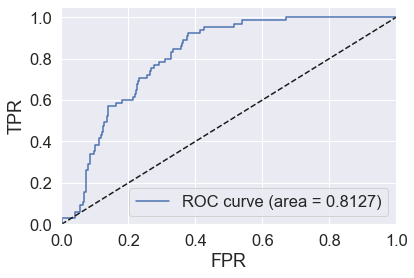

17/17 [==============================] - 0s 4ms/step - loss: 1.1730 - accuracy: 0.4917
14/14 - 0s - loss: 1.1529 - accuracy: 0.4894

Número de épocas: 100.00 - Test accuracy: 48.94


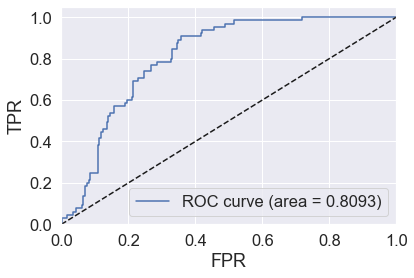

In [25]:
# Compilamos de nuevo con otros hiperparámetros.
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
# entrenamos el modelo
for epoca in epocas:
    model.fit(X_train, y_train, epoca)
    # Evaluamos exactitud
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    print('\nNúmero de épocas: %.02f - Test accuracy: %0.2f' %(epoca,test_acc*100))
    
    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)     
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()   
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')    
    plt.legend(loc="lower right")    
    plt.show()